In [19]:
from utils.dataloader.boy import Boy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False

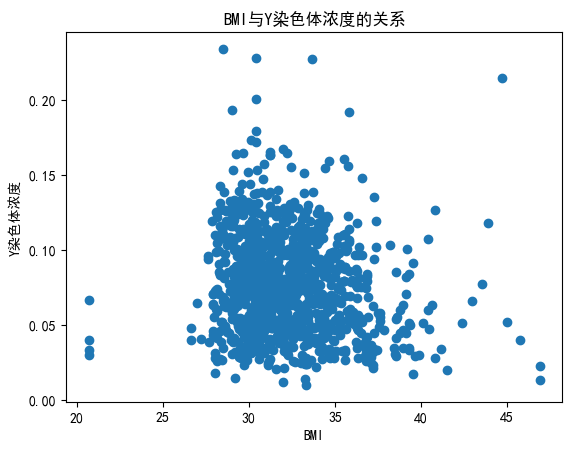

1082 1082
皮尔森相关系数: -0.1512998139245649
斯皮尔曼相关系数: -0.15495941516592615


In [20]:

boy = Boy(file_path="data.xlsx")

X = boy.data['孕妇BMI']
y = boy.data['Y染色体浓度']
plt.figure()
plt.scatter(X, y)
plt.xlabel("BMI")
plt.ylabel("Y染色体浓度")
plt.title("BMI与Y染色体浓度的关系")
plt.show()

print(len(X), len(y))

pearson_coef = np.corrcoef(X, y)[0, 1]
print("皮尔森相关系数:", pearson_coef)

#  Spearman 
from scipy.stats import spearmanr
spearman_coef, _ = spearmanr(X, y)
print("斯皮尔曼相关系数:", spearman_coef)

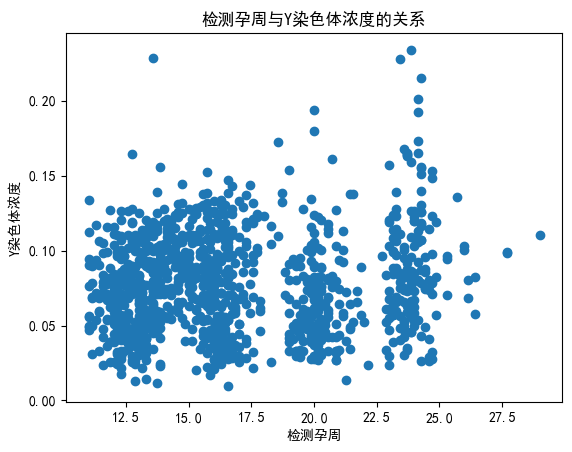

In [21]:
#  孕周~Y染色体浓度
plt.figure()
X = boy.data["检测孕周"].tolist()
y = (boy.data["Y染色体浓度"]).tolist()
# print(len(X), len(y))

plt.scatter(X, y)
plt.xlabel("检测孕周")
plt.ylabel("Y染色体浓度")
plt.title("检测孕周与Y染色体浓度的关系")
plt.show()

<Figure size 2400x500 with 0 Axes>

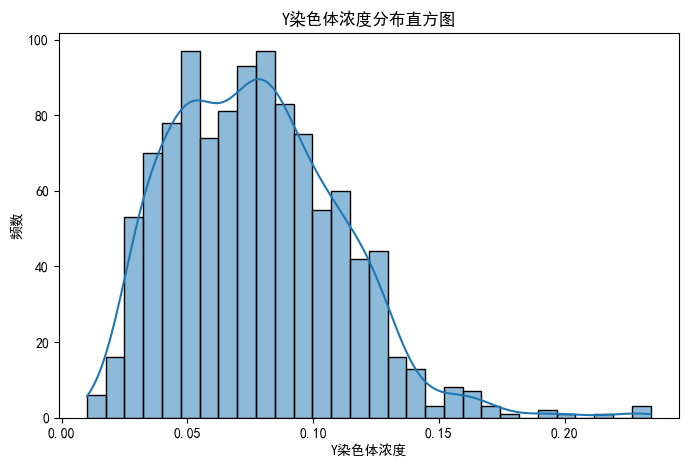

Y染色体浓度均值: 0.07718697843807763
Y染色体浓度标准差: 0.03350291777747562
Y染色体浓度最小值: 0.010003887
Y染色体浓度最大值: 0.234217554


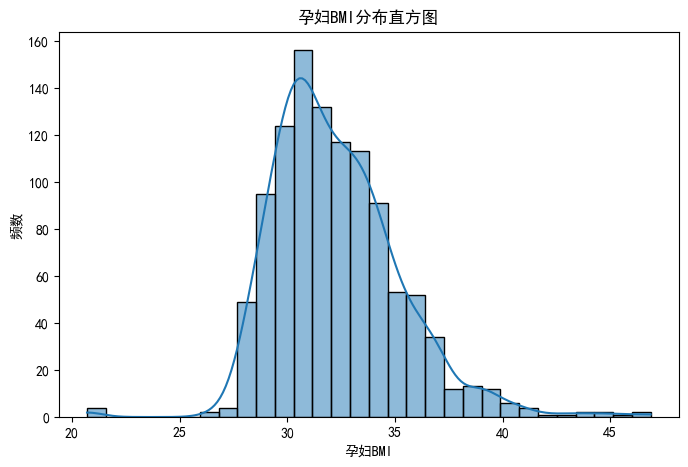

孕妇BMI均值: 32.28879078882743
孕妇BMI标准差: 2.971058109281495
孕妇BMI最小值: 20.703125
孕妇BMI最大值: 46.875


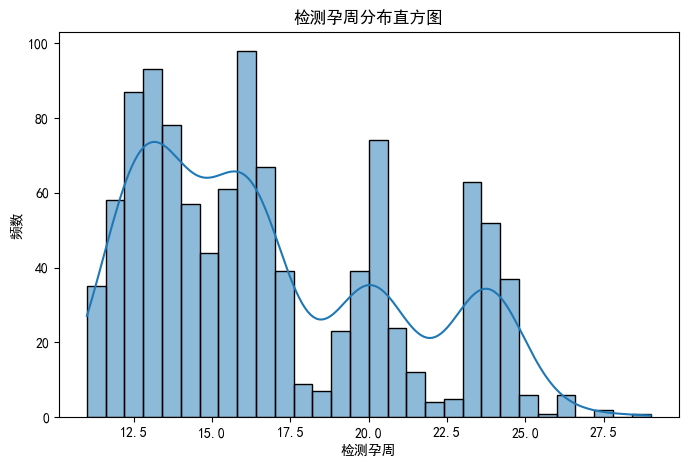

检测孕周均值: 16.845656192236643
检测孕周标准差: 4.07441902003764
检测孕周最小值: 11.0
检测孕周最大值: 29.0


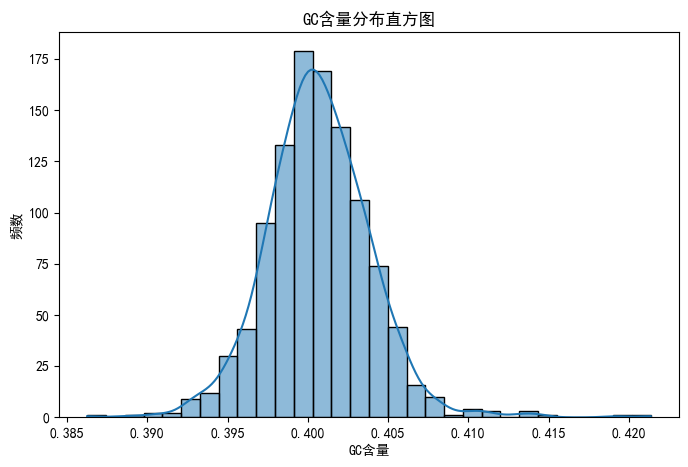

GC含量均值: 0.4006764933197782
GC含量标准差: 0.003305669874231838
GC含量最小值: 0.3862499
GC含量最大值: 0.4213731


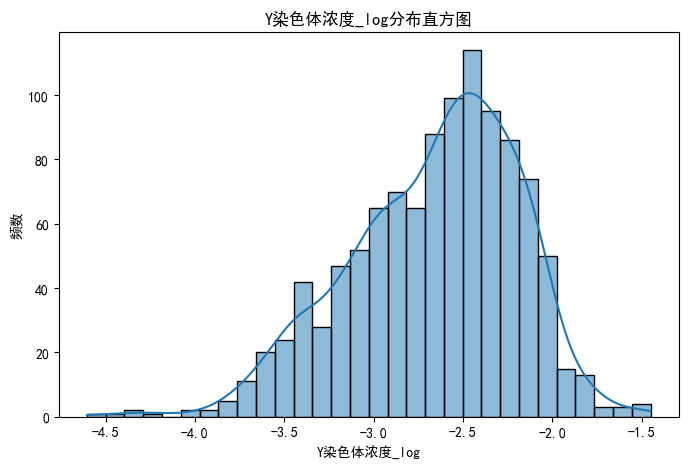

Y染色体浓度_log均值: -2.6635195622307823
Y染色体浓度_log标准差: 0.47142841814032627
Y染色体浓度_log最小值: -4.604781561512366
Y染色体浓度_log最大值: -1.4515048775957613


In [22]:
import seaborn as sns

var_list = np.array([
    'Y染色体浓度' ,
    '孕妇BMI',
    '检测孕周',
    'GC含量',
    'Y染色体浓度_log',
])

plt.figure(figsize=(24, 5))
for i, var in enumerate(var_list):
    # plt.subplot(1,3,i+1)
    plt.figure(figsize=(8, 5))
    sns.histplot(boy.data[var], bins=30, kde=True)
    plt.xlabel(var)
    plt.ylabel("频数")
    plt.title(f"{var}分布直方图")
    plt.show()

    print(f"{var}均值:", boy.data[var].mean())
    print(f"{var}标准差:", boy.data[var].std())
    print(f"{var}最小值:", boy.data[var].min())
    print(f"{var}最大值:", boy.data[var].max())

<Figure size 2400x500 with 0 Axes>

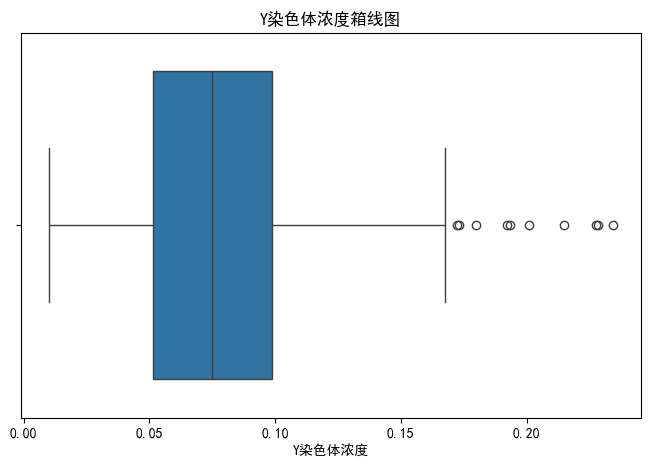

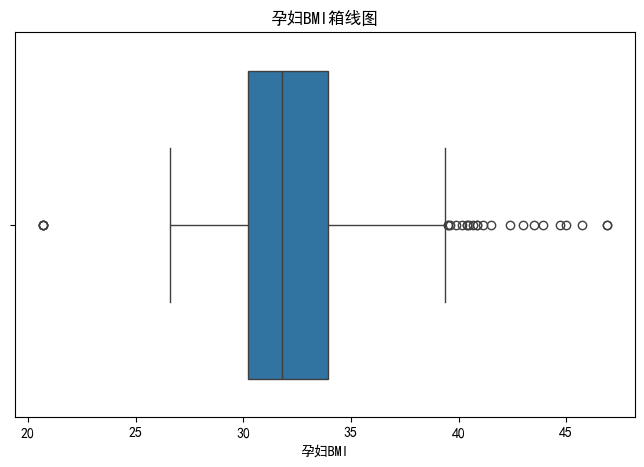

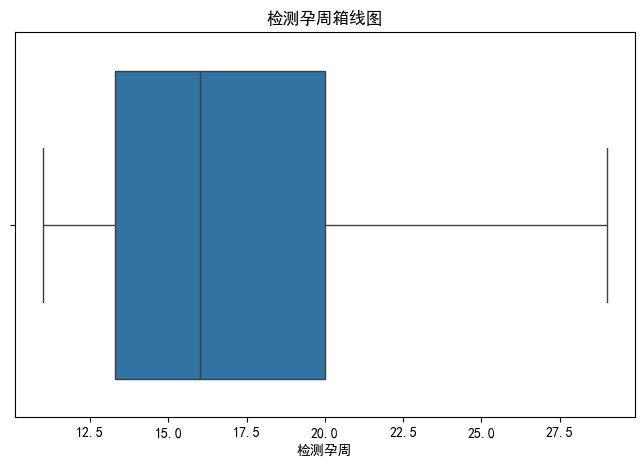

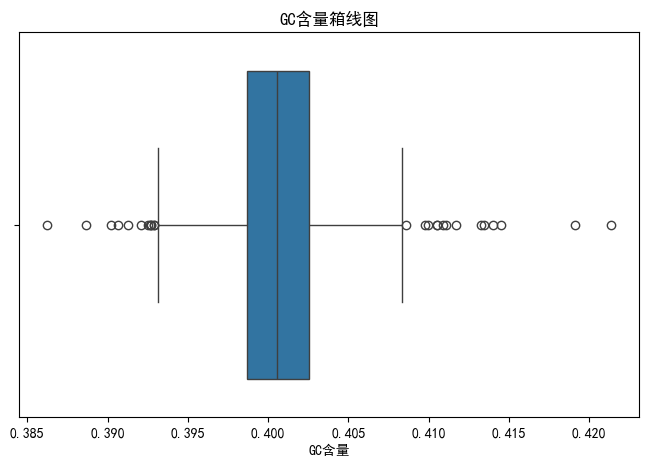

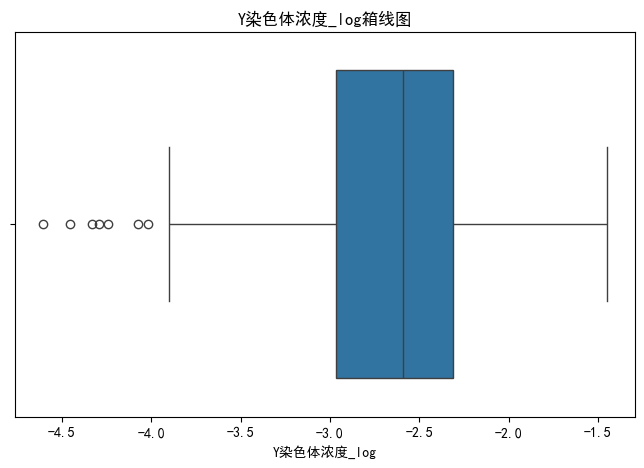

In [23]:
import seaborn as sns

var_list = np.array([
    'Y染色体浓度' ,
    '孕妇BMI',
    '检测孕周',
    'GC含量',
    'Y染色体浓度_log',
])

plt.figure(figsize=(24, 5))
for var in var_list:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=boy.data[var])
    plt.xlabel(var)
    plt.title(f"{var}箱线图")
    plt.show()

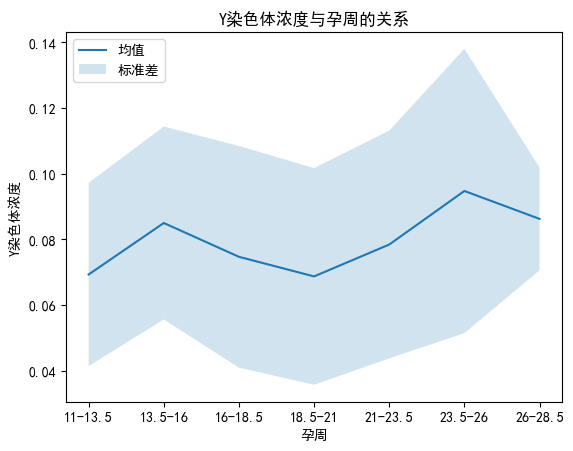

In [24]:
# 孕周分组分析Y染色体浓度，绘制均值和标准差变化趋势图
G_group_bound = [(11,13.5), (13.5,16),(16,18.5),(18.5,21),(21,23.5),(23.5,26),(26,28.5)]
y_mean = []
y_std = []
for bound in G_group_bound:
    G_group_mask = (boy.data["检测孕周"] >= bound[0]) & (boy.data["检测孕周"] < bound[1])
    G_mean = boy.data["Y染色体浓度"][G_group_mask].mean()
    G_std = boy.data["Y染色体浓度"][G_group_mask].std()
    # X.append(G_mean)
    y_mean.append(G_mean)
    y_std.append(G_std)

plt.figure()
plt.plot(y_mean, label="均值")
plt.fill_between(range(len(y_mean)), np.array(y_mean) - np.array(y_std), np.array(y_mean) + np.array(y_std), alpha=0.2, label="标准差")
plt.xticks(range(len(G_group_bound)), [f"{b[0]}-{b[1]}" for b in G_group_bound])
plt.xlabel("孕周")
plt.ylabel("Y染色体浓度")
plt.title("Y染色体浓度与孕周的关系")
plt.legend()
plt.show()


In [25]:
boy.drop_outlier()

In [26]:
# 线性回归分析
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

var_list = np.array([
    '孕妇BMI_Z',
    '检测孕周',
    '年龄', 
    # '原始读段数',
    # '在参考基因组上比对的比例',
    # '重复读段的比例',
    # '唯一比对的读段数',
    # 'GC含量'
])

X = np.array([ 1 * boy.data[key].copy() for key in var_list])
X = X.T
y = boy.data["Y染色体浓度"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R^2:", r2)
print("MSE:", mse)

R^2: 0.021514609912597127
MSE: 0.0007550316316198073


In [28]:
# 非线性回归分析
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

var_list = np.array([
    '孕妇BMI_Z',
    '检测孕周',
    # '年龄',
    # '原始读段数',
    # '在参考基因组上比对的比例',
    # '重复读段的比例',
    # '唯一比对的读段数',
    # 'GC含量'
])

X = np.array([ 1 * boy.data[key].copy() for key in var_list])
X = X.T
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)

y = boy.data["Y染色体浓度"]
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.5, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R^2:", r2)
print("MSE:", mse)

R^2: 0.04376422702085403
MSE: 0.0008573564336036987


GAM R^2: 0.31341060221413686
GAM MSE: 0.0007927916060787751


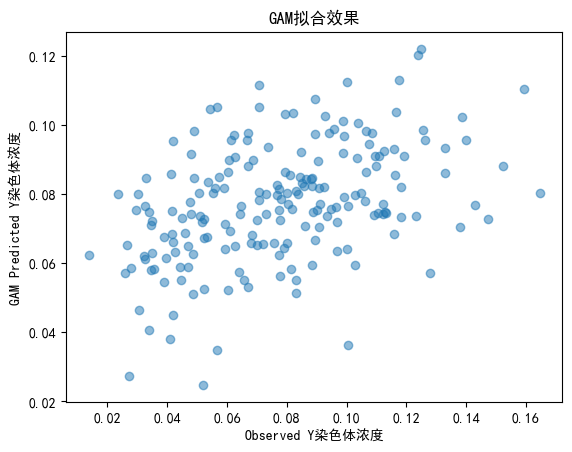

GAM表达式:
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     86.2864
Link Function:                     IdentityLink Log Likelihood:                               -461200.5688
Number of Samples:                          772 AIC:                                           922575.7105
                                                AICc:                                          922598.2527
                                                GCV:                                                0.0009
                                                Scale:                                              0.0007
                                                Pseudo R-Squared:                                   0.3134
Feature Function             

C:\Users\aljcn\AppData\Local\Temp\ipykernel_28904\1588421135.py:40: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  print(gam.summary())


In [29]:
# GAM
from pygam import LinearGAM
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

var_list = np.array([
    '孕妇BMI',
    '检测孕周',
    '年龄',
    # '身高',
    # '体重',
    '原始读段数',
    '在参考基因组上比对的比例',
    '重复读段的比例',
    '唯一比对的读段数',
    'GC含量'
])

X = np.array([ 1 * boy.data[key].copy() for key in var_list])
X = X.T
y = boy.data["Y染色体浓度"]
# y = np.log(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

gam = LinearGAM(n_splines=20).fit(X_train, y_train)

y_gam_pred = gam.predict(X_test)
print("GAM R^2:", gam.statistics_['pseudo_r2']['explained_deviance'])
print("GAM MSE:", mean_squared_error(y_test, y_gam_pred))
plt.figure()
plt.scatter(y_test, y_gam_pred, alpha=0.5)
plt.xlabel("Observed Y染色体浓度")
plt.ylabel("GAM Predicted Y染色体浓度")
plt.title("GAM拟合效果")
plt.show()

# 获取pygam模型的表达式（公式）
print("GAM表达式:")
print(gam.summary())

GAM R^2: 0.5085224639197677
GAM MSE: 0.001029276321086725


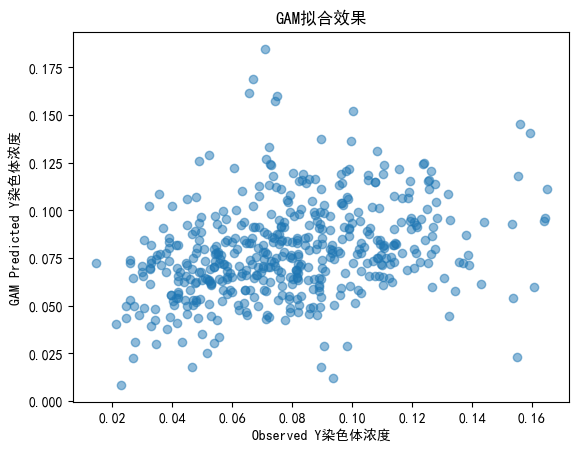

GAM表达式:
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     157.899
Link Function:                     IdentityLink Log Likelihood:                               -217719.1246
Number of Samples:                          483 AIC:                                           435756.0472
                                                AICc:                                          435913.3218
                                                GCV:                                                0.0017
                                                Scale:                                              0.0007
                                                Pseudo R-Squared:                                   0.5085
Feature Function             

C:\Users\aljcn\AppData\Local\Temp\ipykernel_28904\1259217352.py:71: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  print(gam.summary())


In [30]:
# GAM

from pygam import LinearGAM
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

var_list = np.array([
    '孕妇BMI',
    '检测孕周',
    '年龄',
    '原始读段数',
    '在参考基因组上比对的比例',
    '重复读段的比例',
    '唯一比对的读段数',
    'GC含量'
])

square_var_list = np.array([
    '孕妇BMI^2',
    '检测孕周^2',
    '年龄^2',
    '原始读段数^2',
    '在参考基因组上比对的比例^2',
    '重复读段的比例^2',
    '唯一比对的读段数^2',
    'GC含量^2'
])

cross_var_list = np.array([
    '孕妇BMIx检测孕周',
    '孕妇BMIx年龄',
    '孕妇BMIx在参考基因组上比对的比例',
    '孕妇BMIx重复读段的比例',
    '检测孕周x年龄',
    '检测孕周x在参考基因组上比对的比例',
    '检测孕周x重复读段的比例',
    '年龄x在参考基因组上比对的比例',
    '年龄x重复读段的比例',
    '在参考基因组上比对的比例x重复读段的比例'
])

X = []
for key in var_list:
    X.append(1 * boy.data[key].copy())
for key in square_var_list:
    X.append(1 * (boy.data[key[:-2]] ** 2).copy())
for key in cross_var_list:
    key1 = key.split("x")[0]
    key2 = key.split("x")[1]
    X.append(1 * boy.data[key1].copy() * boy.data[key2].copy())
X = np.array(X).T
y = boy.data["Y染色体浓度"]
# y = np.log(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

gam = LinearGAM(n_splines=20).fit(X_train, y_train)

y_gam_pred = gam.predict(X_test)
print("GAM R^2:", gam.statistics_['pseudo_r2']['explained_deviance'])
print("GAM MSE:", mean_squared_error(y_test, y_gam_pred))
plt.figure()
plt.scatter(y_test, y_gam_pred, alpha=0.5)
plt.xlabel("Observed Y染色体浓度")
plt.ylabel("GAM Predicted Y染色体浓度")
plt.title("GAM拟合效果")
plt.show()

# 获取pygam模型的表达式（公式）
print("GAM表达式:")
print(gam.summary())

In [31]:
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod import families
from sklearn.model_selection import train_test_split
var_list = np.array([
    '孕妇BMI',
    '检测孕周',
    '年龄',
    '原始读段数',
    '在参考基因组上比对的比例',
    '重复读段的比例',
    '唯一比对的读段数',
    'GC含量'
])

cross_var_list = np.array([
    '孕妇BMIx检测孕周',
    '孕妇BMIx年龄',
    '孕妇BMIx在参考基因组上比对的比例',
    '孕妇BMIx重复读段的比例',
    '检测孕周x年龄',
    '检测孕周x在参考基因组上比对的比例',
    '检测孕周x重复读段的比例',
    '年龄x在参考基因组上比对的比例',
    '年龄x重复读段的比例',
    '在参考基因组上比对的比例x重复读段的比例'
])

# X = np.array([1 * boy.data[key].copy() for key in var_list])
X = []
for key in var_list:
    X.append(1 * boy.data[key].copy())
for key in cross_var_list:
    key1 = key.split("x")[0]
    key2 = key.split("x")[1]
    X.append(1 * boy.data[key1].copy() * boy.data[key2].copy())

X = np.array(X).T.astype(float)
y = boy.data["Y染色体浓度"].astype(float)
# y = np.log1p(y)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
model = GLM(y_train, X_train, family=families.Gaussian(families.links.log()))
result = model.fit()
print(result.summary())
y_pred = result.predict(X_test)
print("GLM R^2:", r2_score(y_test, y_pred))
print("GLM MSE:", mean_squared_error(y_test, y_pred))


                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  483
Model:                            GLM   Df Residuals:                      465
Model Family:                Gaussian   Df Model:                           17
Link Function:                    log   Scale:                      0.00091835
Method:                          IRLS   Log-Likelihood:                 1012.4
Date:                Fri, 05 Sep 2025   Deviance:                      0.42703
Time:                        16:31:33   Pearson chi2:                    0.427
No. Iterations:                     9   Pseudo R-squ. (CS):             0.1266
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0977      0.382      0.256      0.7

d:\anaconda\envs\pyai\Lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


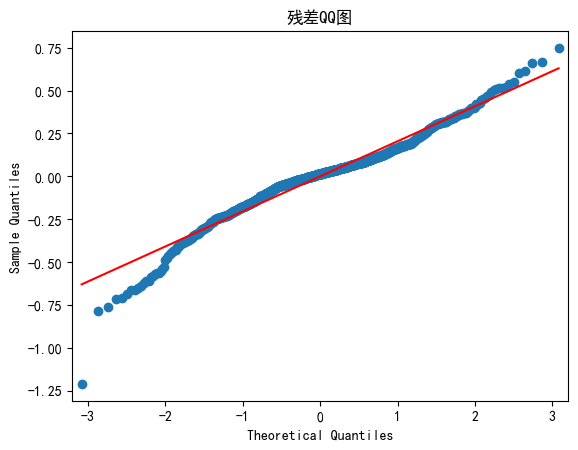

Shapiro检验统计量: 0.9602, p值: 0.0000
残差不服从正态分布（p <= 0.05）
r2: 0.7899661243751059
mse: 0.04186882080655791
          Mixed Linear Model Regression Results
Model:              MixedLM Dependent Variable: Y染色体浓度_log
No. Observations:   966     Method:             REML      
No. Groups:         261     Scale:              0.0557    
Min. group size:    1       Log-Likelihood:     -310.1305 
Max. group size:    5       Converged:          Yes       
Mean group size:    3.7                                   
----------------------------------------------------------
                Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------
Intercept       -2.443    0.265 -9.211 0.000 -2.963 -1.923
I(检测孕周 ** 1)    -0.029    0.019 -1.494 0.135 -0.067  0.009
I(检测孕周 ** 2)     0.002    0.001  3.714 0.000  0.001  0.003
I(孕妇BMI_Z ** 1) -0.045    0.041 -1.099 0.272 -0.124  0.035
I(孕妇BMI_Z ** 2) -0.008    0.024 -0.317 0.751 -0.054  0.039
I(孕妇BMI_Z ** 3) -0.010  

In [37]:
from scipy.stats import shapiro
from sklearn.metrics import r2_score

import statsmodels.formula.api as smf

p = 2
q = 3

gw_terms = ' + '.join(f'I(检测孕周**{k})' for k in range(1, p+1))
bmi_terms = ' + '.join(f'I(孕妇BMI_Z**{k})' for k in range(1, q+1))
age_terms = ' + '.join(f'I(年龄**{k})' for k in range(1, 2))

formular = f'Y染色体浓度_log ~ {gw_terms} + {bmi_terms} + {age_terms}'

# df = boy.data.copy()

mixed_model = smf.mixedlm(formula=formular, data=boy.data, groups=boy.data["孕妇代码"])
# mixed_model = smf.mixedlm(formula = formular, data=boy.data)

result = mixed_model.fit()

y = boy.data['Y染色体浓度_log']
y_mean = y.mean()
fitted = result.fittedvalues
resid = y - fitted
sst = np.sum((y-y_mean)**2)
ssr = np.sum((fitted - y_mean)**2) 
sse = np.sum(resid**2)

# 这样计算的R2是根据拟合值和均值的方差分解公式，适用于普通最小二乘（OLS）模型，但对于混合效应模型（mixedlm），该R2并不是标准定义，且statsmodels的mixedlm没有直接提供R2。
# 更标准的做法是用拟合值与观测值的相关性平方（pseudo R2），或者用statsmodels的rsquared方法（仅部分模型支持）。
# 另一种常用方法是用sklearn的r2_score：
r2 = r2_score(y, fitted)
mse = sse / len(y)
import statsmodels.api as sm

# QQ图
sm.qqplot(resid, line='s')
plt.title("残差QQ图")
plt.show()
# Shapiro检验
shapiro_stat, shapiro_p = shapiro(resid)
print(f"Shapiro检验统计量: {shapiro_stat:.4f}, p值: {shapiro_p:.4f}")
if shapiro_p > 0.1:
    print("残差近似服从正态分布（p > 0.05）")
else:
    print("残差不服从正态分布（p <= 0.05）")
print(f"r2: {r2}")
print(f"mse: {mse}")
print(result.summary())

In [33]:
from scipy.stats import shapiro
import statsmodels.formula.api as smf
import statsmodels.api as sm
from  sklearn.metrics import r2_score, mean_squared_error
import json

p_list = [ i for i in range(1,6)]
q_list = [ i for i in range(1,6)]
results = {}
best_aic = np.inf

for p in p_list:
    for q in q_list:
        gw_terms = ' + '.join(f'I(检测孕周**{k})' for k in range(1, p+1))
        bmi_terms = ' + '.join(f'I(孕妇BMI**{k})' for k in range(1, q+1))

        formular = f'Y染色体浓度 ~ {gw_terms} + {bmi_terms}'

        mixed_model = smf.mixedlm(formula=formular, data=boy.data, groups=boy.data["孕妇代码"])
        result = mixed_model.fit()

        y = boy.data['Y染色体浓度']
        fitted = result.fittedvalues
        r2 = r2_score(y, fitted)
        mse = mean_squared_error(y,fitted)
        aic = 2 * result.llf + 2 * len(result.params)
        
        
        shapiro_stat, shapiro_p = shapiro(resid)
        normality = shapiro_p > 0.1

        log ={
            "r2": r2,
            "mse": mse,
            "shapiro_stat": shapiro_stat,
            "shapiro_p": shapiro_p,
            "normality": normality,
            "log-likelihood": result.llf,
            "aic": aic,
            "params": result.params.to_dict(),
            "pvalues": result.pvalues.to_dict()
        }
        results[f"p={p},q={q}"] = log

        if aic < best_aic:
            best_aic = aic
            results["best_model"] = log
    
with open("mixedlm_formulas_results.json", "w", encoding="utf-8") as f:
    json.dump(results, f, ensure_ascii=False, indent=2)

d:\anaconda\envs\pyai\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
d:\anaconda\envs\pyai\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
d:\anaconda\envs\pyai\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
d:\anaconda\envs\pyai\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
d:\anaconda\envs\pyai\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warn